In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 450kB 30.9MB/s 
     |████████████████████████████████| 92kB 10.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fbd10024d10>)

In [ ]:
train_data = pd.read_table('ratings.txt')

In [ ]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
print(len(train_data)) # 리뷰 개수 출력

199992


In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


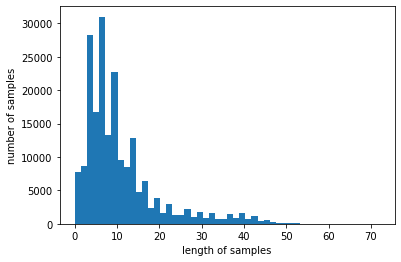

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
print(model.wv.most_similar(positive='조절'))

[('조정', 0.9227699041366577), ('낮추다', 0.9041244983673096), ('높이다', 0.8830315470695496), ('위원회', 0.8604422807693481), ('상향', 0.8285961151123047), ('네티즌', 0.8267672061920166), ('조작', 0.8195257186889648), ('조율', 0.8174881935119629), ('올려주다', 0.8149808645248413), ('깎다', 0.8131601810455322)]


In [ ]:
print(model.wv.most_similar(positive='평점'))

[('점수', 0.8269490003585815), ('평', 0.8173288106918335), ('평이', 0.7413816452026367), ('평정', 0.7360728979110718), ('댓글', 0.7084604501724243), ('리뷰', 0.665436863899231), ('평가', 0.6516600251197815), ('수위', 0.6209137439727783), ('평론', 0.6095600128173828), ('악평', 0.5998690724372864)]


In [ ]:
print(model.wv.most_similar(positive='위원회'))

[('로튼토마토', 0.870184600353241), ('조절', 0.8604421615600586), ('조정', 0.8377156257629395), ('상향', 0.817264199256897), ('방지', 0.7992779612541199), ('준놈', 0.7968044281005859), ('올린다', 0.7950265407562256), ('올려주다', 0.7936711311340332), ('추방', 0.7927401065826416), ('뻥튀기', 0.7913971543312073)]


In [ ]:
for token in tokenized_data:
  if '조절' in token:
    print(token)

['구르다', '알바', '아니다', '마블', '팬', '아니다', '정말', '나', '재밌다', '보다', '점주', '고', '싶다', '평점', '조절', '을', '위해', '점']
['인물', '행동', '을', '조금', '만', '살피', '면', '영화', '굉장하다', '재밌다', '느껴지다', '영화', '직접', '나서다', '사람', '이렇다', '생각', '을', '말', '하', '지는', '않다', '인물', '감정', '확실하다', '드러내다', '전개', '오', '바하', '지', '않다', '점', '너무', '좋다', '페이스', '조절', '훌륭', '무게', '적당', '자다', '만들어지다', '영화', '다']
['평점', '조절', '위해', '점', '내', '가보다', '땐', '점', '보다', '아래', '로', '준애', '문학', '적', '소양', '전혀', '없다', '애']
['평점', '조절', '점', '적당']
['영화', '박자', '디테', '이다', '정말', '시가전', '퀄리티', '완벽하다', '남자', '사랑', '대한', '묘사', '작', '중', '한석규', '누군가', '사랑', '마음', '정말', '디테', '일이', '대단하다', '마지막', '얘기', '완', '급', '조절', '완벽하다', '영화', '정말', '멋지다']
['다소', '아쉽다', '작품', '점', '정도', '적당하다', '듯', '평점', '조절']
['평점', '조절']
['평점', '조절', '위원회', '에서', '나오다', '절대', '평점', '점', '짜다', '영화', '아니다', '평점', '너무하다', '생각', '그나저나', '김성수', '감독', '독', '비도', '도대체', '언제', '찍다', '거', '냐', '고', '오', '응', '옛날', '꺼', '보다', '다시', '한번', '복기', '중', '여러분', '감기', '조심하다', '웃음']
['평점'

In [ ]:
for token in tokenized_data:
  if '조절' in token:
    if '평점' in token:
      if '위원회' in token:
        print(token)

['평점', '조절', '위원회', '에서', '나오다', '절대', '평점', '점', '짜다', '영화', '아니다', '평점', '너무하다', '생각', '그나저나', '김성수', '감독', '독', '비도', '도대체', '언제', '찍다', '거', '냐', '고', '오', '응', '옛날', '꺼', '보다', '다시', '한번', '복기', '중', '여러분', '감기', '조심하다', '웃음']
['평점', '조절', '위원회']
['그렇다', '나다', '평점', '조절', '위원회']
['평점', '조절', '위원회']
['평점', '조절', '위원회']
['평점', '조절', '위원회']
['평점', '조절', '위원회']
['평점', '조절', '위원회', '웃음']
['영화', '최고', '그러나', '평점', '조절', '을', '위해', '평점', '조절', '위원회', '에서나', '오다', '웃음']
['평점', '조절', '위원회', '에서', '나오다', '그것', '원조', '웃음']
['평점', '조절', '위원회']
['평점', '조절', '위원회']
['평점', '조절', '위원회']
['평점', '조절', '위원회']
['평점', '조절', '위원회', '에서', '나오다', '호갱', '님']
['결코', '평점', '짜다', '리', '절대', '아니다', '생각', '감히', '점줌', '평점', '조절', '위원회', '웃음']
['평점', '조절', '위원회']
['평점', '조절', '위원회']
['개인', '적', '으론', '점', '만점', '주다', '싶다', '평점', '조', '절차', '원', '에서', '평점', '조절', '위원회', '웃음']
['평점', '조절', '위원회', '에서', '일', '나오다', '오늘', '일이', '없다', '웃음']
['평점', '조절', '위원회']
['평점', '조절', '위원회', '에서', '나오다', '웃음', '김혜선', '내일', '오다',

서로 가까운 위치에 있는 친구들도 유사하게 학습됨

이걸 학습시키기 위해서는 데이터 셋에 동일한 친구들이 많이 존재해야 제대로 학습될 듯

따라서 Word2Vec 알고리즘은 리스트의 순서가 매우 중요!

그러므로 추천시스템에 Word2Vec 알고리즘을 활용하기 위해서는 리스트(문장내에 존재하는 Content)를 무작위로 섞음으로써 문맥상의 유사도를 약화시키고 비슷한 위치에 있는 아이템을 유사하게 학습시킬 수 있다. 그러나 시간에 의한 Latent Factor도 같이 사라질 수 있다는 점에 유의하자!

Word2Vec은 빈도 수를 기반으로 학습된다

In [ ]:
print(model.wv.most_similar(positive='네이버'))

[('네티즌', 0.7961341142654419), ('전문가', 0.7625975012779236), ('올리다', 0.7400590777397156), ('등록', 0.7383944988250732), ('낮추다', 0.7175102233886719), ('조작', 0.7105758786201477), ('관람객', 0.7103785872459412), ('평론가', 0.6969466805458069), ('조절', 0.6843596696853638), ('알바', 0.6770818829536438)]


In [ ]:
for token in tokenized_data:
  if '네이버' in token:
    print(token)

['원', '네이버', '에서', '다운', '받다', '보다', '재밌다', 'ㅋㅋ']
['무간도', '가다', '이해', '어렵다', '번', '씩', '보고', '그래도', '이해', '안', '돼다', '네이버', '해석', '본보다', '그렇다', '소름', '쫙', '돋다', '니', '들머리', '로', '해석', '닌', '끄다', '무간도', '가다', '그냥', '만들어지다', '아니다', '다', '스토리', '이어지다', '내', '가보다', '땐', '무간도', '진국', '이다', '니', '들머리', '로는', 'ㅉㅉ']
['마잭팬', '께', '투표', '부탁드리다', '유럽', '단체', '상', '을', '수상하다', '가장', '유명하다', '사람', '을', '찾다', '있다', '위', '에서', '월', '일', '끄다', '네이버', '로그아웃', '매', '일', '투표', '가능하다', '요트', '윗', '메일', '보내다', '표']
['재다', '여배우', '이쁘다', '평점', '보고', '안', '보다', '후회', '네이버', '평점', '믿다', '알다']
['네이버', '야', '줌', '추다', '숲', '뭐', '냐']
['처음', '네이버', '검색', '때', '이영화', '아니다', '알다', '점수', '그지같다']
['영화', '진짜', '후회', '안', '만큼', '매력', '적', '이다', '다만', '네이버', '적다', '줄거리', '핵심', '을', '다', '벗어나다', '있다', '신경', '쓰다', '말다', '제발', '영화', '보다', '제대로', '쓰다', '아니다', '그냥', '외국', '꺼', '번역', '이라도']
['솔직하다', '개쪈다', '네이버', '에서', '프로메테우스', '함께', '저', '평가', '되다', '작품']
['이런', '명작', '평점', '왜', '이르다', '네이버', '수준']
['별', '기대', '안', '엄청', '좋다

In [ ]:
for token in tokenized_data:
  if '네티즌' in token:
    print(token)

['후', '점', '가다', '더', '좋다', '평', '을', '안', '남기다', '준', '네티즌', '분들', '눈', '높다', '네', '예', '영화관', '에서', '보다', '오래', '돼다', '지금', '인상', '적', '이다', '뇌리', '강력하다', '남다', '잔인하다', '하지만', '극', '완성', '집중', '볼', '만', '만들다']
['솔직하다', '점', '감다', '아니다', '네티즌', '평점', '너무', '낮다', '점', '주다', '기대', '이상', '잼', '잇다']
['평점', '믿다', '말다', 'ㅎㅎ', '배역', '이름', '홍진호', '라는', '부분', '에서', '만년', '위', '프로게이머', '홍진호', '기념', '위해', '점', '을', '맞추다', '네티즌', '힘쓰다', '그렇다', 'ㅋㅋ']
['점수', '분포도', '보다', '알다', '티아라', '소', '연', '민폐', '녀', '휴', '때문', '점', '준', '네티즌', '많다', 'ㅠㅠ', '정말', '빛', '을', '못', '보다', '작품', '인', '것', '같다', '아쉽다', '정말', '재밌다', '유쾌하다', '조여정', '씨', '귀엽다', '김강우', '정말', '멋지다', '아']
['개쩌', '영화', '원', '작', '게임', '을', '해보다', '않다', '미치다', '몰입', '감', '을', '준', '영화', '평점', '을', '올', '리기', '위', '점', '주다', '울', '나라', '네티즌', '영', '화보', '수준', '이란']
['영화', '지다', '들이다', '보다', '야동', '하고', '구별', '못', '한심하다', '네티즌', '엑기스', '나', '다운', '받다', '보다', '들이다', '예술', '을', '알다']
['생각', '보다', '네티즌', '평점', '저조하다', '엄청', '잼', '나다']
['네티즌', '수준',

In [ ]:
for token in tokenized_data:
  if '네티즌' in token:
    if '네이버' in token:
      print(token)

['어느', '나라', '사람', '보다', '욕', '글로벌', '쓰래', '기', '영화', '네이버', '영화', '네티즌', '자주', '명언', '마디', '인용', '걸', '영화', '라고', '만들다', '점', '없다', '감독', '을', '죽이다', '쓰래', '기', '가지', '모두', '해당', '되다', '영화', '아']
['네이버', '사용', '처음', '영화', '후기', '남기다', '보다', '거', '네티즌', '평점', '너무', '잘못', '된거', '아니다', '정말', '릴리', '콜린스', '얼굴', '말고는', '남다', '하나', '없다', '원작', '책', '맞다', '의심스럽다', '정도', '로', '내용', '엉망', '사이먼', '이빨', '자국', '복선', '보이다', '아무', '일도', '없다']


서로 문맥상 비슷한 위치에 있는 것도 가깝게 학습됨

Word2Vec은 빈도 수를 기반으로 학습을 진행한다.

네이버 옆에 평점이라는 단어가 많이 반복

네티즌 옆에 평점이라는 단어가 많이 반복

전문가 옆에 평점이라는 단어가 많이 반복

따라서 네이버, 네티즌, 전문가는 비슷한 문맥에 사용된 단어이기 때문에 유사하다고 할 수 있다. 